# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Q1 : Find the to 10 countries with most projects
#### 1.1 Load into a wbd_df by reading the json file into  a pandas data-frame 
#### 1.2  Examine  a few rows

In [8]:
# load Pandas dataframe of the entire dataset
wbd_df = pd.read_json("data/world_bank_projects.json")

In [9]:
# Examine a a few rows
wbd_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


#### 1.3 Transpose the columns to get a better view of all columns

In [10]:
# how about tanspose and see
wbd_df.transpose()


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
_id,{'$oid': '52b213b38594d8a2be17c780'},{'$oid': '52b213b38594d8a2be17c781'},{'$oid': '52b213b38594d8a2be17c782'},{'$oid': '52b213b38594d8a2be17c783'},{'$oid': '52b213b38594d8a2be17c784'},{'$oid': '52b213b38594d8a2be17c785'},{'$oid': '52b213b38594d8a2be17c786'},{'$oid': '52b213b38594d8a2be17c787'},{'$oid': '52b213b38594d8a2be17c788'},{'$oid': '52b213b38594d8a2be17c789'},...,{'$oid': '52b213b38594d8a2be17c96a'},{'$oid': '52b213b38594d8a2be17c96b'},{'$oid': '52b213b38594d8a2be17c96c'},{'$oid': '52b213b38594d8a2be17c96d'},{'$oid': '52b213b38594d8a2be17c96e'},{'$oid': '52b213b38594d8a2be17c96f'},{'$oid': '52b213b38594d8a2be17c970'},{'$oid': '52b213b38594d8a2be17c971'},{'$oid': '52b213b38594d8a2be17c972'},{'$oid': '52b213b38594d8a2be17c973'}
approvalfy,1999,2015,2014,2014,2014,2014,2014,2014,2014,2014,...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
board_approval_month,November,November,November,October,October,October,October,October,October,October,...,August,August,August,August,August,August,August,August,August,August
boardapprovaldate,2013-11-12T00:00:00Z,2013-11-04T00:00:00Z,2013-11-01T00:00:00Z,2013-10-31T00:00:00Z,2013-10-31T00:00:00Z,2013-10-31T00:00:00Z,2013-10-29T00:00:00Z,2013-10-29T00:00:00Z,2013-10-29T00:00:00Z,2013-10-29T00:00:00Z,...,2012-08-29T00:00:00Z,2012-08-24T00:00:00Z,2012-08-21T00:00:00Z,2012-08-21T00:00:00Z,2012-08-17T00:00:00Z,2012-08-10T00:00:00Z,2012-08-09T00:00:00Z,2012-08-03T00:00:00Z,2012-08-02T00:00:00Z,2012-08-02T00:00:00Z
borrower,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,GOVERNMENT OF TUNISIA,MINISTRY OF FINANCE AND ECONOMIC DEVEL,MIN. OF PLANNING AND INT'L COOPERATION,MINISTRY OF FINANCE,REPUBLIC OF KENYA,GOVERNMENT OF INDIA,PEOPLE'S REPUBLIC OF CHINA,THE GOVERNMENT OF INDIA,THE KINGDOM OF MOROCCO,...,GOVERNMENT OF NEPAL,PALESTINIAN WATER AUTHORITY,GOVERNMENT OF PAKISTAN,GOVERNMENT OF BANGLADESH,MINISTRY OF EDUCATION,THE COMPETITIVENESS COMPANY,LAO PEOPLES DEMOCRATIC REPUBLIC,GOVERNMENT OF THE REPUBLIC OF GUINEA,REPUBLIC OF INDONESIA,GOVERMENT OF KENYA
closingdate,2018-07-07T00:00:00Z,NaN,NaN,NaN,2019-04-30T00:00:00Z,NaN,2019-06-30T00:00:00Z,NaN,2018-12-31T00:00:00Z,2014-12-31T00:00:00Z,...,2014-06-30T00:00:00Z,2014-03-31T00:00:00Z,2015-06-30T00:00:00Z,2015-04-30T00:00:00Z,2014-06-30T00:00:00Z,2013-08-31T00:00:00Z,2012-12-31T00:00:00Z,2014-12-31T00:00:00Z,2017-09-30T00:00:00Z,2018-12-31T00:00:00Z
country_namecode,Federal Democratic Republic of Ethiopia!$!ET,Republic of Tunisia!$!TN,Tuvalu!$!TV,Republic of Yemen!$!RY,Kingdom of Lesotho!$!LS,Republic of Kenya!$!KE,Republic of India!$!IN,People's Republic of China!$!CN,Republic of India!$!IN,Kingdom of Morocco!$!MA,...,Nepal!$!NP,West Bank and Gaza!$!GZ,Islamic Republic of Pakistan!$!PK,People's Republic of Bangladesh!$!BD,Nepal!$!NP,Jamaica!$!JM,Lao People's Democratic Republic!$!LA,Republic of Guinea!$!GN,Republic of Indonesia!$!ID,Republic of Kenya!$!KE
countrycode,ET,TN,TV,RY,LS,KE,IN,CN,IN,MA,...,NP,GZ,PK,BD,NP,JM,LA,GN,ID,KE
countryname,Federal Democratic Republic of Ethiopia,Republic of Tunisia,Tuvalu,Republic of Yemen,Kingdom of Lesotho,Republic of Kenya,Republic of India,People's Republic of China,Republic of India,Kingdom of Morocco,...,Nepal,West Bank and Gaza,Islamic Republic of Pakistan,People's Republic of Bangladesh,Nepal,Jamaica,Lao People's Democratic Republic,Republic of Guinea,Republic of Indonesia,Republic of Kenya
countryshortname,Ethiopia,Tunisia,Tuvalu,"Yemen, Republic of",Lesotho,Kenya,India,China,India,Morocco,...,Nepal,West Bank and Gaza,Pakistan,Bangladesh,Nepal,Jamaica,Lao People's Democratic Republic,Guinea,Indonesia,Kenya


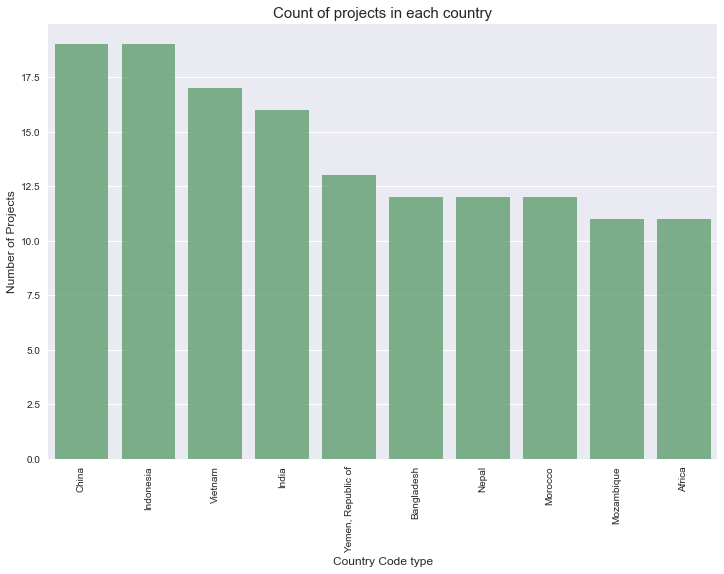

In [11]:
# Lets count the country's with most counts - count of projects
% matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

cnt_proj = wbd_df.countryshortname.value_counts()
cnt_proj_top_10 = cnt_proj[0:10]
plt.figure(figsize=(12,8))
sns.barplot(cnt_proj_top_10.index, cnt_proj_top_10.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Projects', fontsize=12)
plt.xlabel('Country Code type', fontsize=12)
plt.title('Count of projects in each country', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()




In [12]:
cnt_proj_top_10.head(10)


China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Nepal                 12
Morocco               12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

### Q2 Find the top 10 major project themes (using column 'mjtheme_namecode')
In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [13]:
wbd_df = pd.read_json((open('data/world_bank_projects.json')))


In [14]:
wbd_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [15]:
wbd_mjtheme_df = pd.DataFrame(columns=['code','name'])
for line in wbd_df.mjtheme_namecode:
    wbd_mjtheme_df = wbd_mjtheme_df.append(json_normalize(line))



In [16]:
wbd_mjtheme_df.head(10)


,code,name
0,8,Human development
1,11,
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration
1,2,Public sector governance
2,11,Environment and natural resources management
3,6,Social protection and risk management
0,7,Social dev/gender/inclusion
1,7,Social dev/gender/inclusion


There seem to be missing names for some of the codes...
So what we do next is to drop all the rows with empty rows
We will create a dictionary to fill in the blank entries
But first, we save the theme_df with blanks away as wbd_orig_theme_df

Then, let us drop the entries with empty names

In [17]:
wbd_mjtheme_df.shape

(1499, 2)

In [18]:
wbd_mjtheme_df = wbd_mjtheme_df[wbd_mjtheme_df['name']!=""]

In [19]:
wbd_mjtheme_df.shape

(1377, 2)

We dropped 122 entries with empty names. Now we drop the duplicates  and we form the dictionary out of it.

In [20]:
wbd_mjtheme_df = wbd_mjtheme_df.drop_duplicates()

In [21]:
wbd_mjtheme_df.shape

(11, 2)

In [22]:
wbd_mjtheme_df.set_index('code', inplace=True)
print(wbd_mjtheme_df)

                                              name
code                                              
8                                Human development
1                              Economic management
6            Social protection and risk management
5                            Trade and integration
2                         Public sector governance
11    Environment and natural resources management
7                      Social dev/gender/inclusion
4         Financial and private sector development
10                               Rural development
9                                Urban development
3                                      Rule of law


In [23]:
#### Next we convert the df with unique non-empty values into dictionary

In [24]:
wbd_mjtheme_dict = {}
wbd_mjtheme_dict = wbd_mjtheme_df.to_dict('index')

In [25]:
wbd_mjtheme_dict

{'1': {'name': 'Economic management'},
 '10': {'name': 'Rural development'},
 '11': {'name': 'Environment and natural resources management'},
 '2': {'name': 'Public sector governance'},
 '3': {'name': 'Rule of law'},
 '4': {'name': 'Financial and private sector development'},
 '5': {'name': 'Trade and integration'},
 '6': {'name': 'Social protection and risk management'},
 '7': {'name': 'Social dev/gender/inclusion'},
 '8': {'name': 'Human development'},
 '9': {'name': 'Urban development'}}

#### Dictionary has been created   - now we fill in the blank entries

In [26]:
#
wbd_final_mjtheme_df = pd.DataFrame(columns=['code','name'])
for line in wbd_df.mjtheme_namecode:
    wbd_final_mjtheme_df = wbd_final_mjtheme_df.append(json_normalize(line))
     

In [27]:
## Create a list using list comprehension
code_list = list(wbd_final_mjtheme_df['code'])
name_list = []
name_list = [wbd_mjtheme_dict[x]['name']for x  in code_list]
wbd_final_mjtheme_df['name']= name_list

##### We are done cleaning the empty cells

In [28]:
wbd_final_mjtheme_df.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration


In [29]:
### Question 3 : The top 10 Project themes

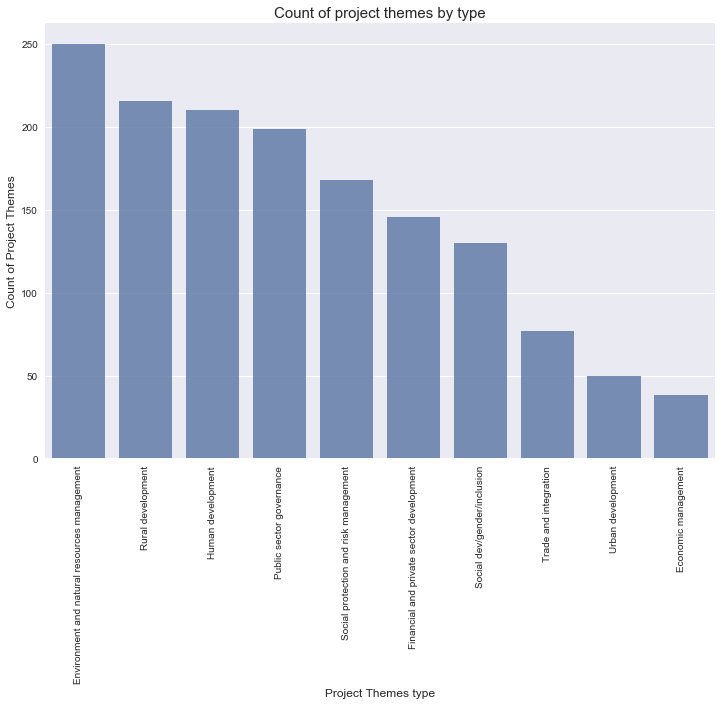

In [30]:
cnt_mjthemes = wbd_final_mjtheme_df.name.value_counts()
cnt_mjthemes_top_10 = cnt_mjthemes[0:10]
plt.figure(figsize=(12,8))
sns.barplot(cnt_mjthemes_top_10.index, cnt_mjthemes_top_10.values, alpha=0.8, color=color[0])
plt.ylabel('Count of Project Themes', fontsize=12)
plt.xlabel('Project Themes type', fontsize=12)
plt.title('Count of project themes by type', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [31]:
print(cnt_mjthemes_top_10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64
